In [153]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df = pd.read_excel("data.xlsx" , converters= {"year":str , "sem" : str})
df.drop(columns= "Unnamed: 0" , inplace= True)

In [149]:
pvt = df.pivot_table(index=["year","sem","subject","section","situation"] , values="x_bar" , aggfunc="mean")
pvt.reset_index(inplace=True)


## Distribution of X-Bar each year

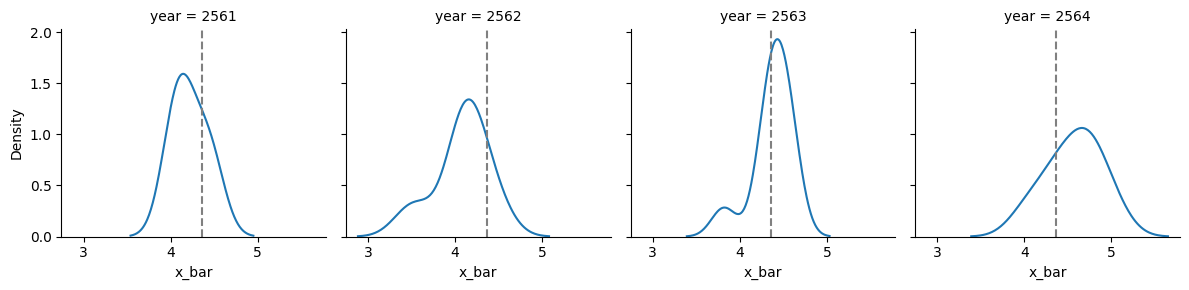

In [132]:
g = sns.FacetGrid(pvt , col ="year")
g.map(sns.kdeplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


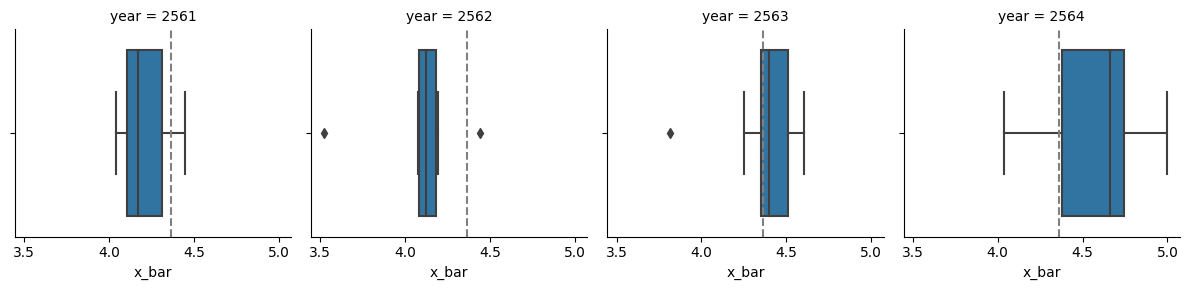

In [146]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.boxplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


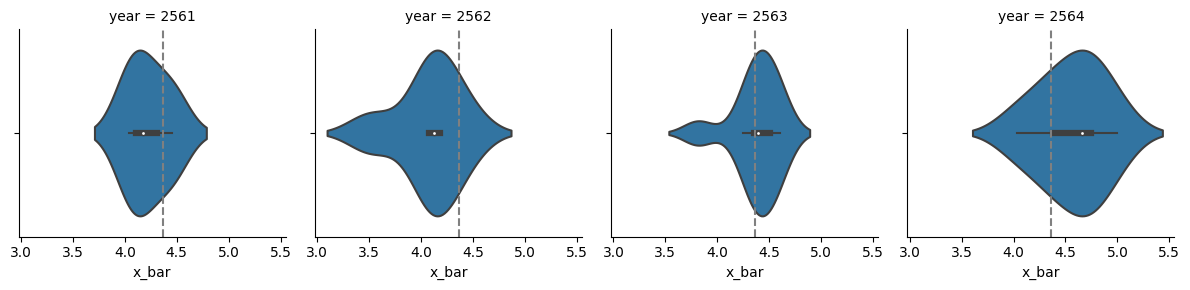

In [152]:
g = sns.FacetGrid(pvt , col = "year")
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

## Distribution of X-Bar each situation

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


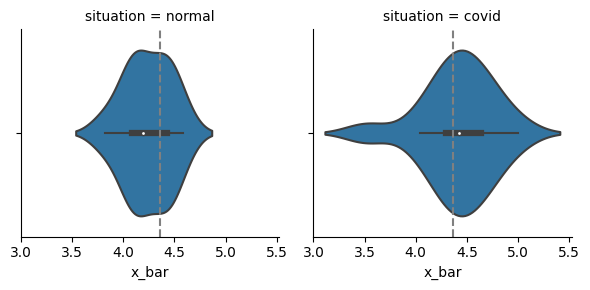

In [151]:
g = sns.FacetGrid(pvt , col = "situation")
g.map(sns.violinplot , "x_bar")
g.refline(x=pvt["x_bar"].median())

In [134]:
covid = df[df["situation"] == "covid"]
normal= df[df["situation"] == "normal"]

## Ploting IQR each year

In [222]:
Q_75 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.75))
Q_25 = df.pivot_table(index='year',values="x_bar", aggfunc=lambda x: np.quantile(x, 0.25))

Q_25.reset_index(inplace= True)
Q_25.rename(columns={"x_bar":"Q25"} , inplace= True)
Q_75.reset_index(inplace= True)
Q_75.rename(columns={"x_bar":"Q75"} , inplace= True)

IQR = pd.merge(Q_25 , Q_75 , on= "year")
IQR["IQR"] = IQR["Q75"] - IQR["Q25"]

IQR

,year,Q25,Q75,IQR
0,2561,4.0000,4.5700,0.5700
1,2562,3.9075,4.5000,0.5925
2,2563,4.2475,4.5925,0.3450
3,2564,4.4050,4.7900,0.3850


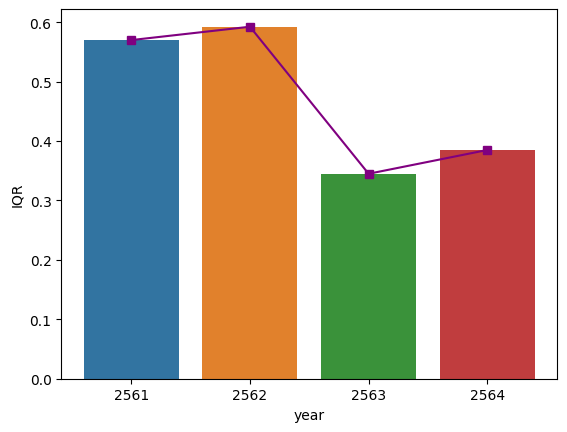

In [221]:
sns.barplot(data = IQR , x="year" , y="IQR")
plt.plot(IQR["year"], IQR["IQR"] , color = "purple" , marker = "s")